# Auto generated report for all zones

This notebook generates for each available geographic zone a summary of the most recent simulation.


## Preparation

### Loading libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display, Markdown, Latex

In [3]:
import os
from functools import partial

In [4]:
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
from numpy import unique

In [5]:
from model_analysis import * 

### Loading data

In [6]:
run_manifest = read_manifest('run-manifest.csv')
run_manifest = run_manifest.loc[run_manifest["version"]=="v5",]
analysis_set = get_analysis_set(run_manifest)

runs\base-mobility-fullrun-20200527T230708-3790666\base-mobility-fullrun-20200527T230708-3790666-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200527T230708-3790666
runs\base-mobility-fullrun-20200528T223059-3792704\base-mobility-fullrun-20200528T223059-3792704-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T223059-3792704
runs\base-mobility-fullrun-20200526T225333-3789804\base-mobility-fullrun-20200526T225333-3789804-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T225333-3789804
runs\base-mobility-fullrun-20200526T225529-3789804\base-mobility-fullrun-20200526T225529-3789804-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T225529-3789804
runs\base-mobility-fullrun-20200527T230709-3790665\base-mobility-fullrun-20200527T230709-3790665-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200527T230709-3790665
runs\base-mobility-fullrun-20200528T222228-3792703\base-mobility-fullrun-20200528T222228-3792703-covars-alpha-reduction.

runs\base-mobility-fullrun-20200526T225428-3789804\base-mobility-fullrun-20200526T225428-3789804-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T225428-3789804
runs\base-mobility-fullrun-20200527T230805-3790665\base-mobility-fullrun-20200527T230805-3790665-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200527T230805-3790665
runs\base-mobility-fullrun-20200528T222322-3792703\base-mobility-fullrun-20200528T222322-3792703-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T222322-3792703
runs\base-mobility-fullrun-20200526T225428-3789803\base-mobility-fullrun-20200526T225428-3789803-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200526T225428-3789803
runs\base-mobility-fullrun-20200527T230804-3790664\base-mobility-fullrun-20200527T230804-3790664-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200527T230804-3790664
runs\base-mobility-fullrun-20200528T222322-3792702\base-mobility-fullrun-20200528T222322-3792702-covars-alpha-reduction.

 runs\base-mobility-fullrun-20200528T222424-3792703
runs\base-mobility-fullrun-20200528T222425-3792702\base-mobility-fullrun-20200528T222425-3792702-covars-alpha-reduction.csv
 runs\base-mobility-fullrun-20200528T222425-3792702


In [7]:
def add_to_zone_dict(zone_dict, row, i, zone):
    zone_dict[zone] = {
        "index": i,
        "date": row["last available data"],
        "version": row["version"],
    }

zone_dict = {}
for i, row in analysis_set.iterrows():
    for zone in row["modelling zones"]:
        if zone not in zone_dict:
            add_to_zone_dict(zone_dict, row, i, zone)
        elif (zone_dict[zone]["date"] < row["last available data"])\
            or (zone_dict[zone]["date"] == row["last available data"]
                and zone_dict[zone]["version"] < row["version"]):
            add_to_zone_dict(zone_dict, row, i, zone)

zone_dict   

{'Auvergne-Rhône-Alpes': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Bourgogne-Franche-Comté': {'index': 110,
  'date': '2020-05-28',
  'version': 'v5'},
 'Bretagne': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Corse': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'France-OC19': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'France-hopitaux': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Grand Est': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Hauts-de-France': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Normandie': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Nouvelle-Aquitaine': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Occitanie': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 'Pays de la Loire': {'index': 110, 'date': '2020-05-28', 'version': 'v5'},
 "Provence-Alpes-Côte d'Azur": {'index': 110,
  'date': '2020-05-28',
  'version': 'v5'},
 'Île-de-France': {'index': 

In [8]:
indices = unique([zone_dict[d]['index'] for d in zone_dict])
country_2_region = {}
for idx in indices:
    for country in analysis_set.loc[idx,].model.data['ifr']['country'].unique():
        country_2_region[country] = {}

for idx in indices:
    for _, row in analysis_set.loc[idx,].model.data['ifr'].iterrows():
        country_2_region[row['country']][row['region']] = zone_dict[row['region']]['index']
country_2_region

{'France': {'Auvergne-Rhône-Alpes': 110,
  'Bourgogne-Franche-Comté': 110,
  'Bretagne': 110,
  'Centre-Val de Loire': 110,
  'Corse': 110,
  'Grand Est': 110,
  'Hauts-de-France': 110,
  'Normandie': 110,
  'Nouvelle-Aquitaine': 110,
  'Occitanie': 110,
  'Pays de la Loire': 110,
  "Provence-Alpes-Côte d'Azur": 110,
  'Île-de-France': 110,
  'France-hopitaux': 110,
  'France-OC19': 110,
  'France-EHPAD': 110,
  'France': 111},
 'Denmark': {'Denmark': 111},
 'Italy': {'Italy': 111},
 'Germany': {'Germany': 111},
 'Spain': {'Spain': 111},
 'United_Kingdom': {'United_Kingdom': 111},
 'Norway': {'Norway': 111},
 'Belgium': {'Belgium': 111},
 'Austria': {'Austria': 111},
 'Sweden': {'Sweden': 111},
 'Switzerland': {'Switzerland': 111},
 'Greece': {'Greece': 111},
 'Portugal': {'Portugal': 111},
 'Netherlands': {'Netherlands': 111}}

In [20]:
args = analysis_set.loc[idx,].model.data["arguments"].set_index("Unnamed: 0")
args["",]

## Plotting functions

First we define a custom process that will print for each zone.

In [9]:
def process_zone(zone, zone_dict, model_data, title_ext=""):
    display(Markdown(
        f"### {zone}{title_ext} \n\n Latest simulation on data from {zone_dict['date']}"
        + f" with version {zone_dict['version']}"
    ))
    axs = plot_zones_summary(zone, model_data)
    axis_date_limits(axs, max_date='2020-07-01')
    plt.show()
    plt.close()

In [10]:
def print_zone(file_in, img_dir, file_dir, zone, zone_dict, model_data, title_ext="", img_ext=".png"):
    img_file = os.path.join(img_dir, (zone + '_' + zone_dict['date'].strip() + img_ext).replace(" ", "_"))
    
    unix_rel_img_path = os.path.relpath(img_file, file_dir).replace('\\','/')
    file_in.write(
        f"### {zone}{title_ext} \n\n Latest simulation on data from {zone_dict['date']}"
        + f" with version {zone_dict['version']} \n\n ![img_file]({unix_rel_img_path})\n\n"
    )
    axs = plot_zones_summary(zone, model_data)
    axis_date_limits(axs, max_date='2020-07-01')
    axs[0].figure.savefig(img_file, bbox_inches='tight')
    plt.close(axs[0].figure)

And then we apply this function to every zone that has been identified.

In [11]:
def apply_process_to_data(
    process_func, country_2_region, analysis_set, zone_dict,
    display_func=lambda x:display(Markdown(x))
):
    display_func("# Country reports\n")
    for country in country_2_region:
        display_func(f"## {country}\n")
        if country in country_2_region[country]:
            idx = zone_dict[country]['index']
            process_func(
                country, zone_dict[country], 
                analysis_set.loc[idx, 'model'].data,
                title_ext=" - (country)")
        
        for zone in sorted([z for z in country_2_region[country]]):
            if zone != country:
                idx = zone_dict[zone]['index']
                process_func(
                    zone, zone_dict[zone], 
                    analysis_set.loc[idx, 'model'].data)

In [12]:
def apply_process_region_split(
    process_func, country_2_region, analysis_set, zone_dict,
    display_func=lambda x:display(Markdown(x))):
    display_func("# Country reports\n")
    for country in country_2_region:
        display_func(f"# Rapport de simulation sur la progression et l'impact du COVID19 en {country}\n\n")


        display_func(f"## Résultats au niveau {country}\n\n")
        display_func(
            "Dans cette section vous retrouverez des délimitations non géographiques"
            + "de la population\n\n"
        )
        country_level_list = []
        region_level_list = []
        for region in country_2_region[country]:
            if region[:len(country)] == country:
                country_level_list.append(region)
            else:
                region_level_list.append(region)

        for zone in sorted(country_level_list):
            idx = zone_dict[zone]['index']
            process_func(
                zone, zone_dict[zone], 
                analysis_set.loc[idx, 'model'].data)
        if len(region_level_list)> 0:
            display_func(f"## Résultats régionaux en {country}\n")
            for zone in sorted(region_level_list):
                idx = zone_dict[zone]['index']
                process_func(
                    zone, zone_dict[zone], 
                    analysis_set.loc[idx, 'model'].data)

# Country reports


# Rapport de simulation sur la progression et l'impact du COVID19 en France



## Résultats au niveau France



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### France 

 Latest simulation on data from 2020-05-28 with version v5

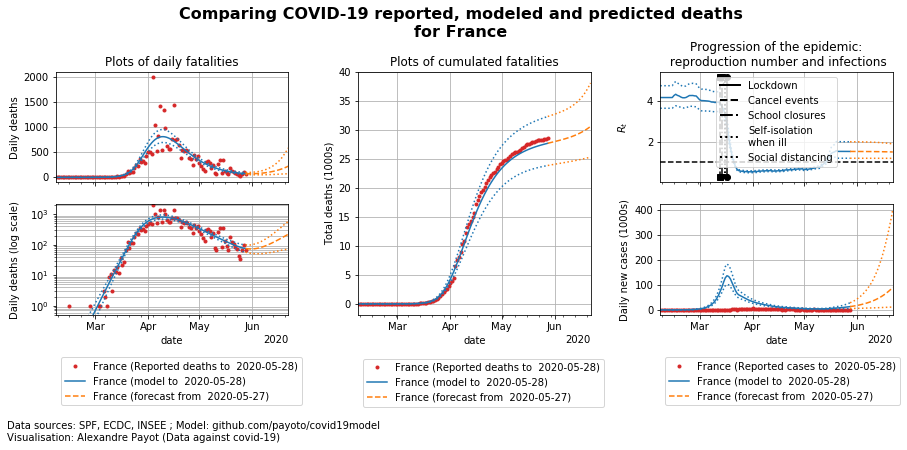

### France-EHPAD 

 Latest simulation on data from 2020-05-28 with version v5

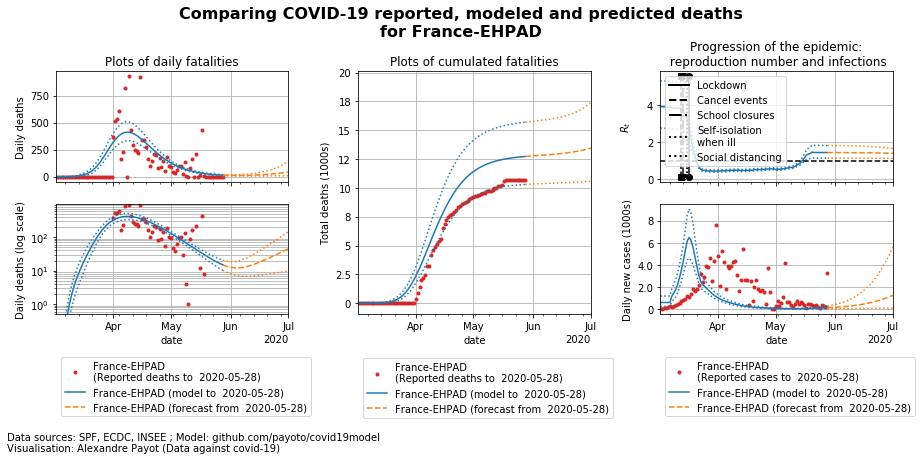

### France-OC19 

 Latest simulation on data from 2020-05-28 with version v5

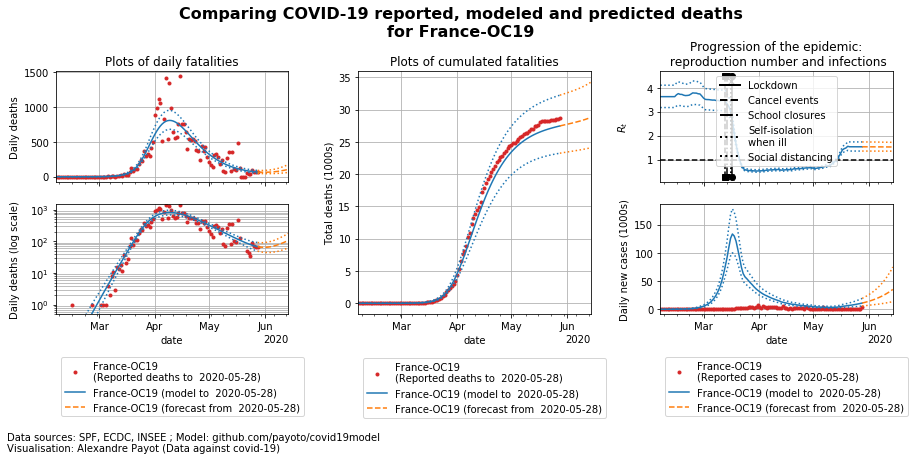

### France-hopitaux 

 Latest simulation on data from 2020-05-28 with version v5

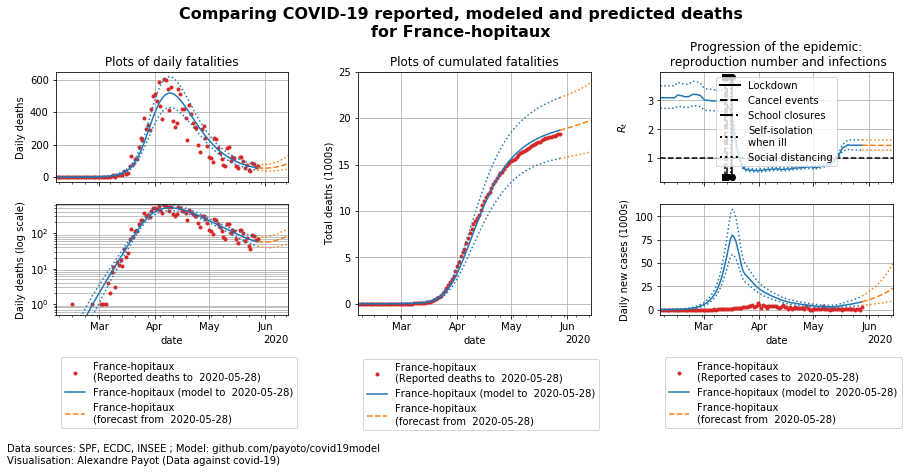

## Résultats régionaux en France


### Auvergne-Rhône-Alpes 

 Latest simulation on data from 2020-05-28 with version v5

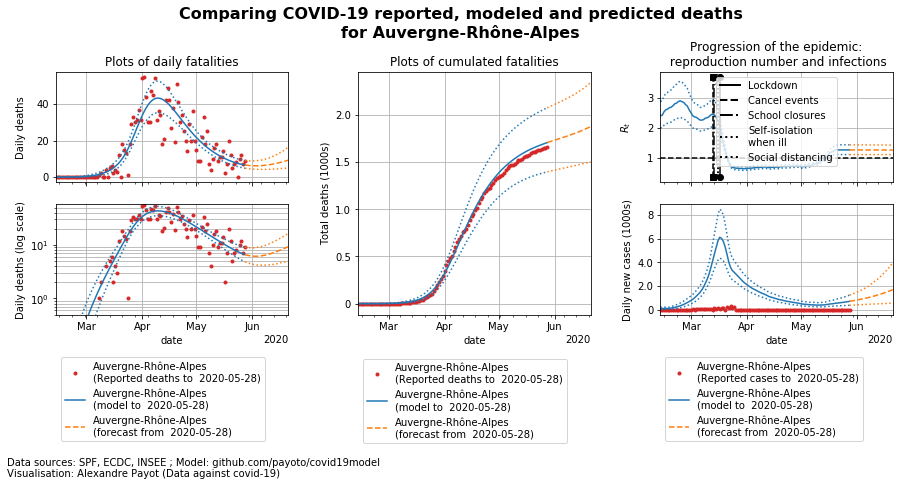

### Bourgogne-Franche-Comté 

 Latest simulation on data from 2020-05-28 with version v5

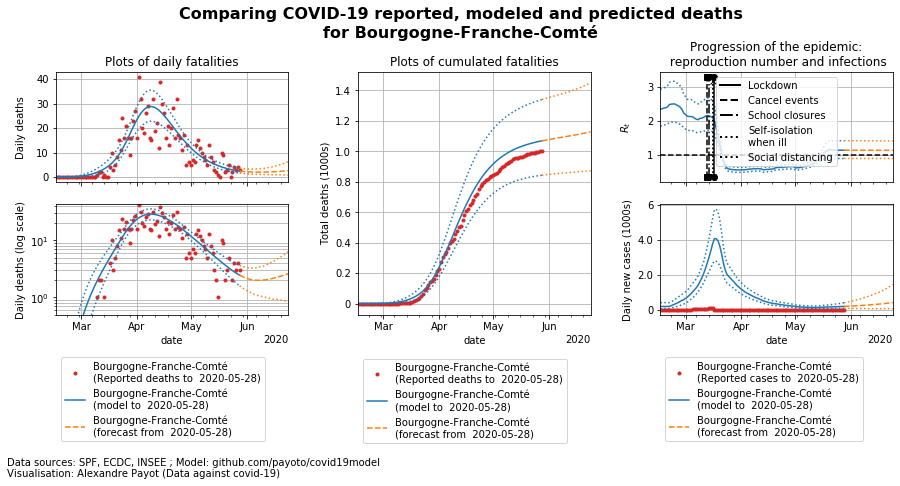

### Bretagne 

 Latest simulation on data from 2020-05-28 with version v5

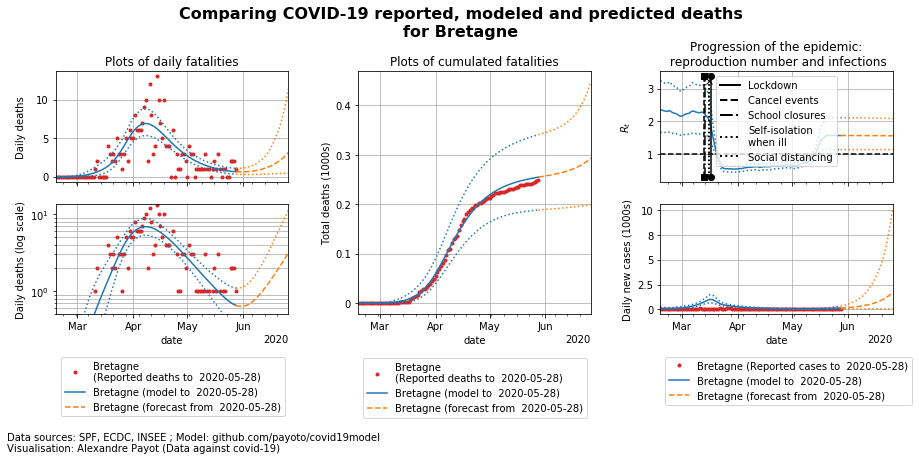

### Centre-Val de Loire 

 Latest simulation on data from 2020-05-28 with version v5

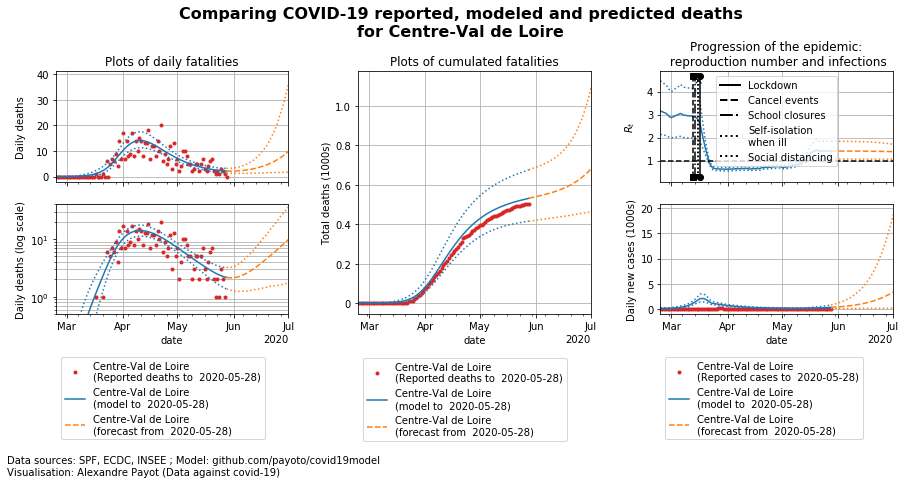

### Corse 

 Latest simulation on data from 2020-05-28 with version v5

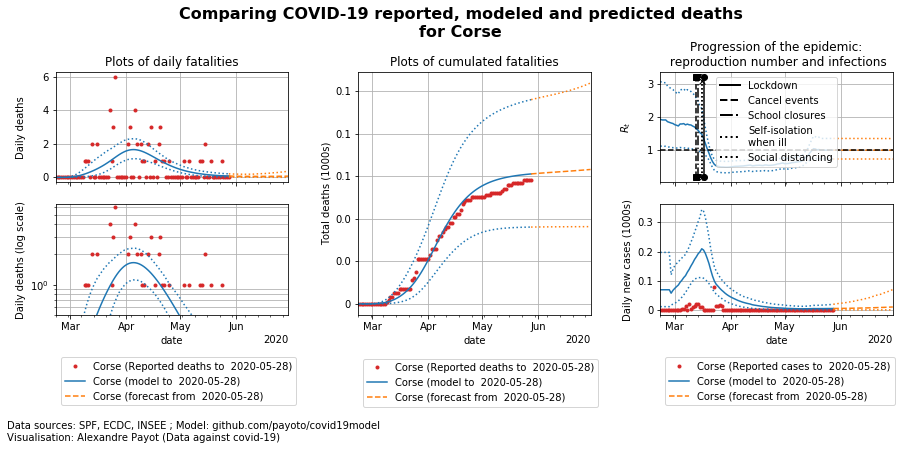

### Grand Est 

 Latest simulation on data from 2020-05-28 with version v5

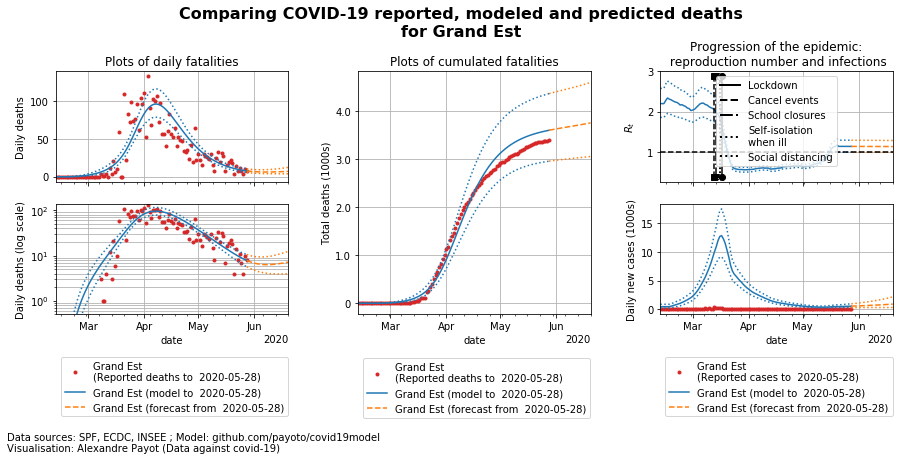

### Hauts-de-France 

 Latest simulation on data from 2020-05-28 with version v5

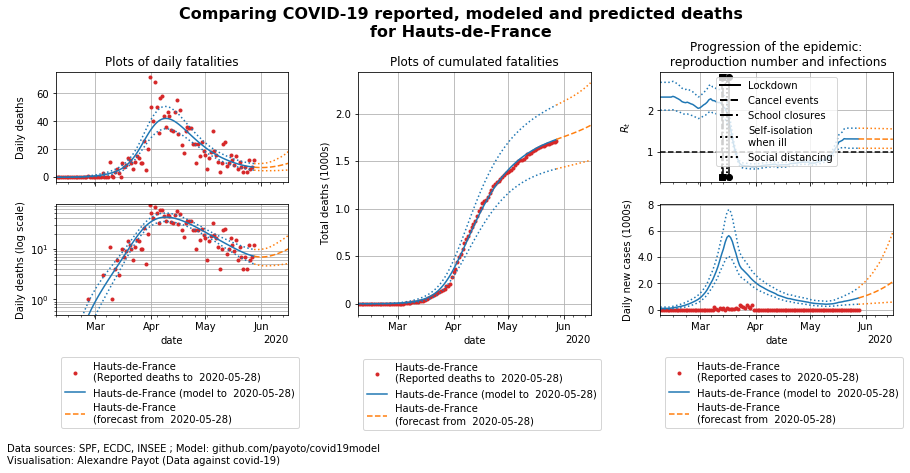

### Normandie 

 Latest simulation on data from 2020-05-28 with version v5

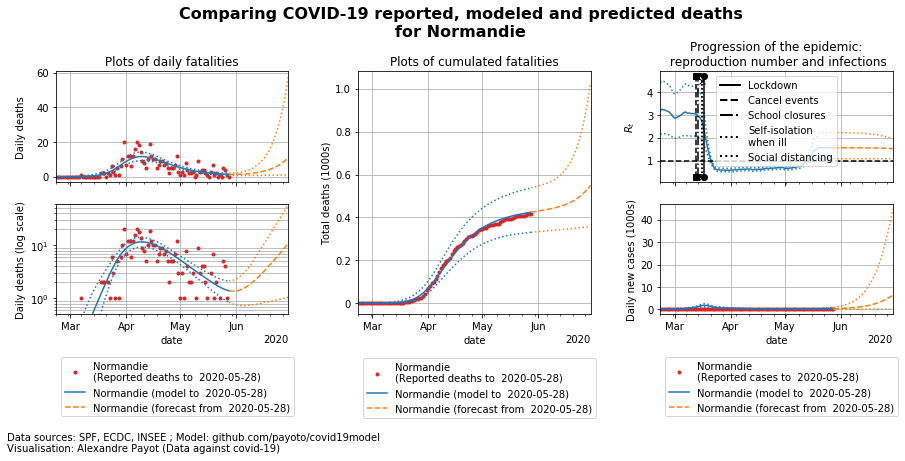

### Nouvelle-Aquitaine 

 Latest simulation on data from 2020-05-28 with version v5

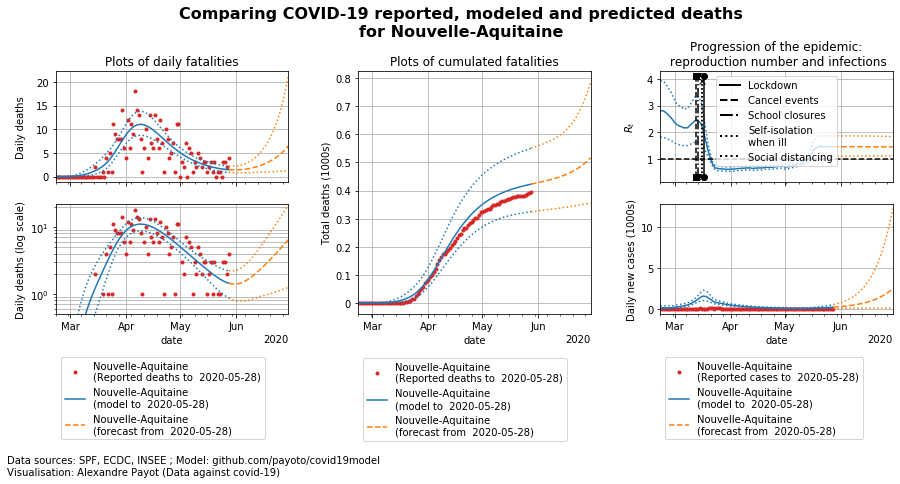

### Occitanie 

 Latest simulation on data from 2020-05-28 with version v5

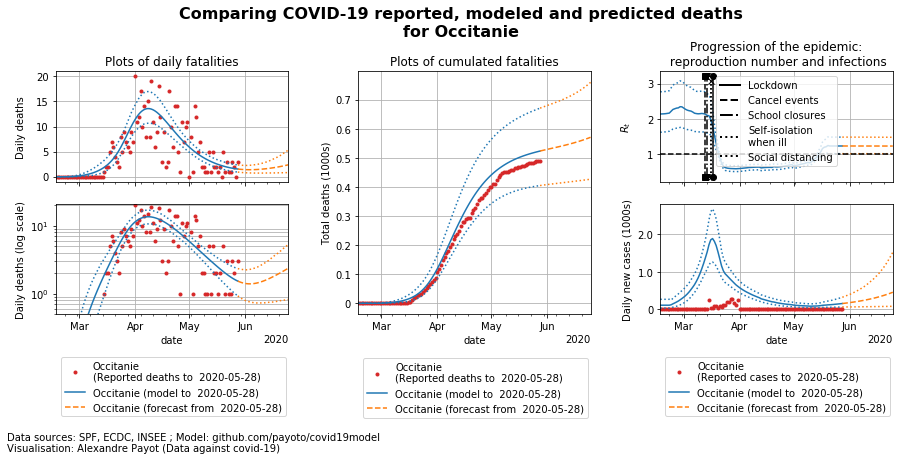

### Pays de la Loire 

 Latest simulation on data from 2020-05-28 with version v5

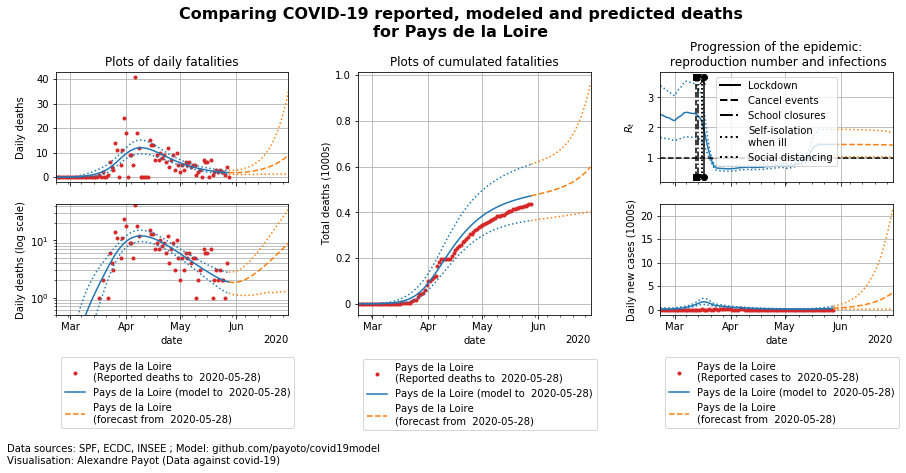

### Provence-Alpes-Côte d'Azur 

 Latest simulation on data from 2020-05-28 with version v5

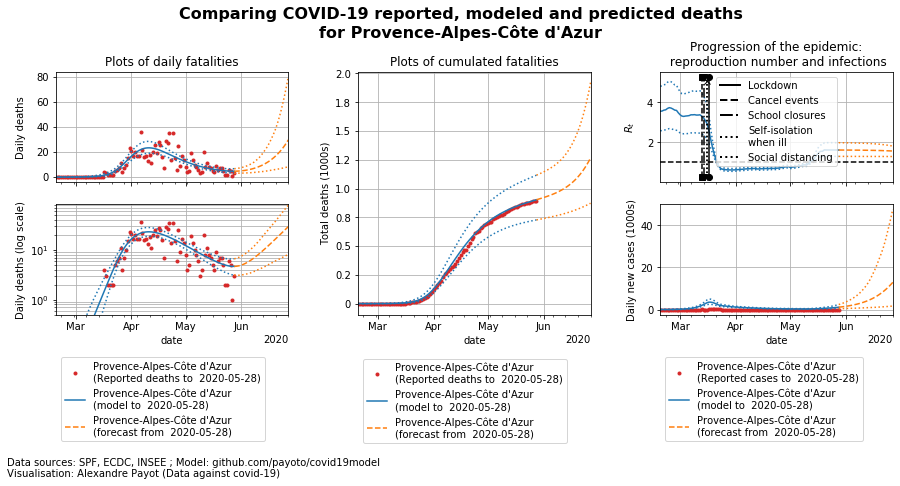

### Île-de-France 

 Latest simulation on data from 2020-05-28 with version v5

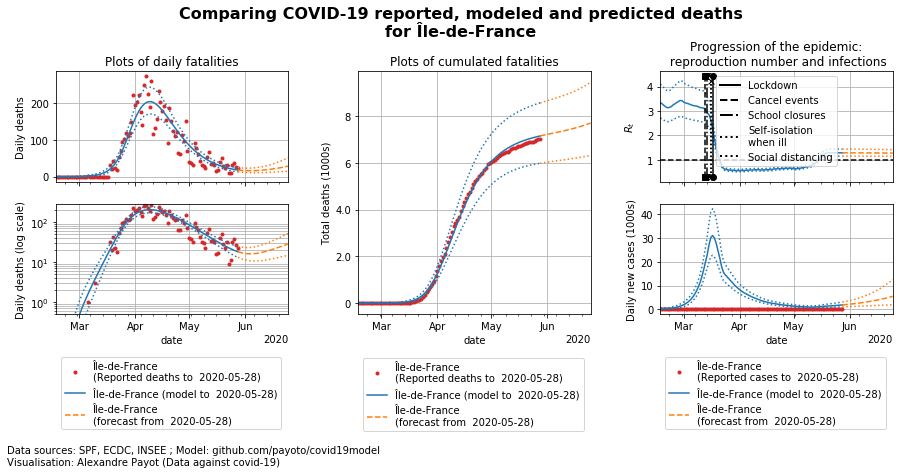

# Rapport de simulation sur la progression et l'impact du COVID19 en Denmark



## Résultats au niveau Denmark



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Denmark 

 Latest simulation on data from 2020-05-28 with version v5

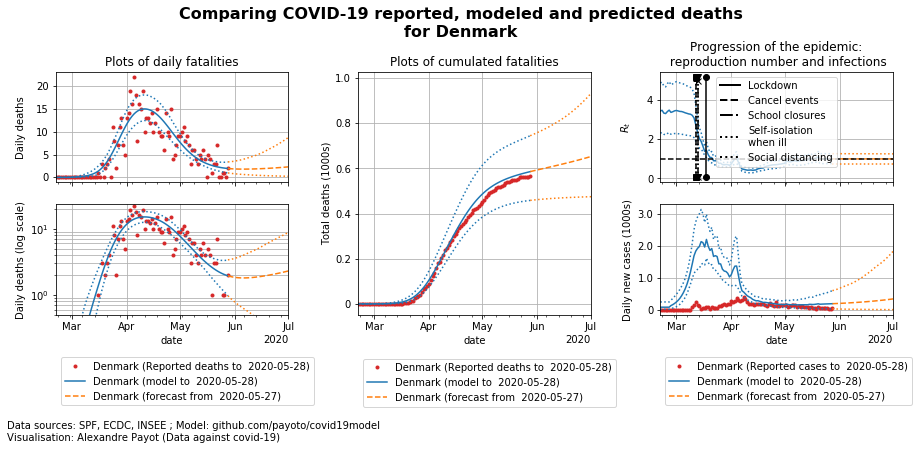

# Rapport de simulation sur la progression et l'impact du COVID19 en Italy



## Résultats au niveau Italy



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Italy 

 Latest simulation on data from 2020-05-28 with version v5

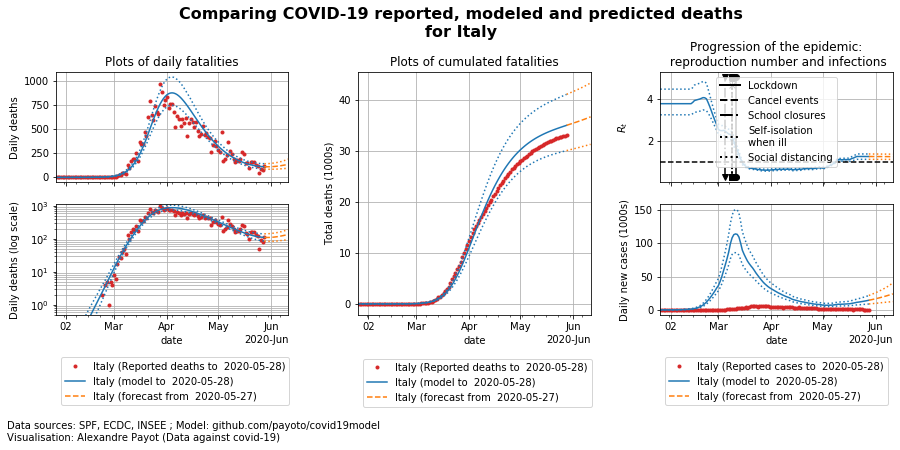

# Rapport de simulation sur la progression et l'impact du COVID19 en Germany



## Résultats au niveau Germany



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Germany 

 Latest simulation on data from 2020-05-28 with version v5

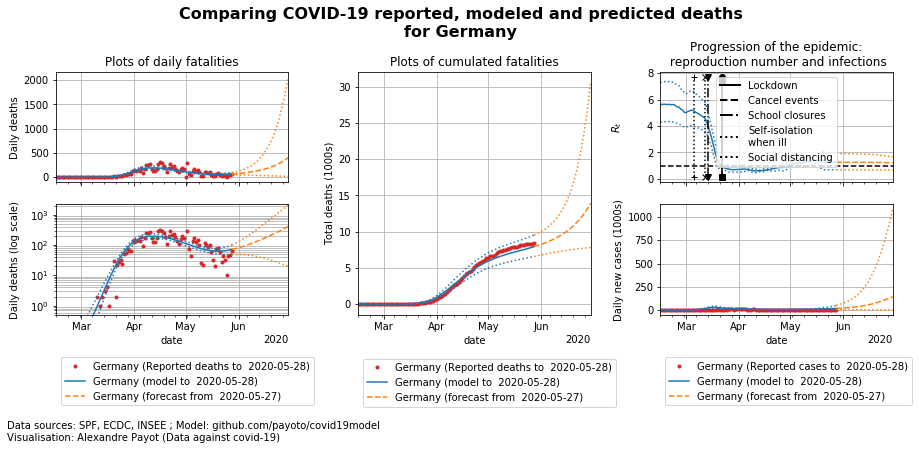

# Rapport de simulation sur la progression et l'impact du COVID19 en Spain



## Résultats au niveau Spain



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Spain 

 Latest simulation on data from 2020-05-28 with version v5

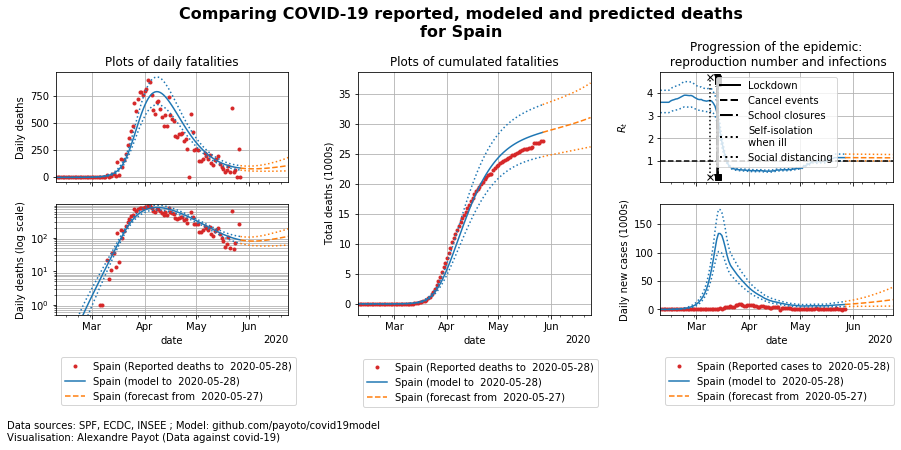

# Rapport de simulation sur la progression et l'impact du COVID19 en United_Kingdom



## Résultats au niveau United_Kingdom



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### United_Kingdom 

 Latest simulation on data from 2020-05-28 with version v5

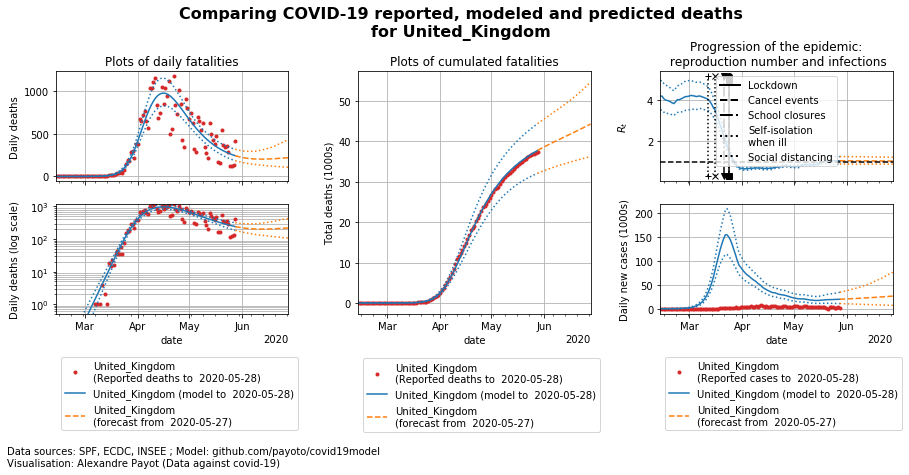

# Rapport de simulation sur la progression et l'impact du COVID19 en Norway



## Résultats au niveau Norway



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Norway 

 Latest simulation on data from 2020-05-28 with version v5

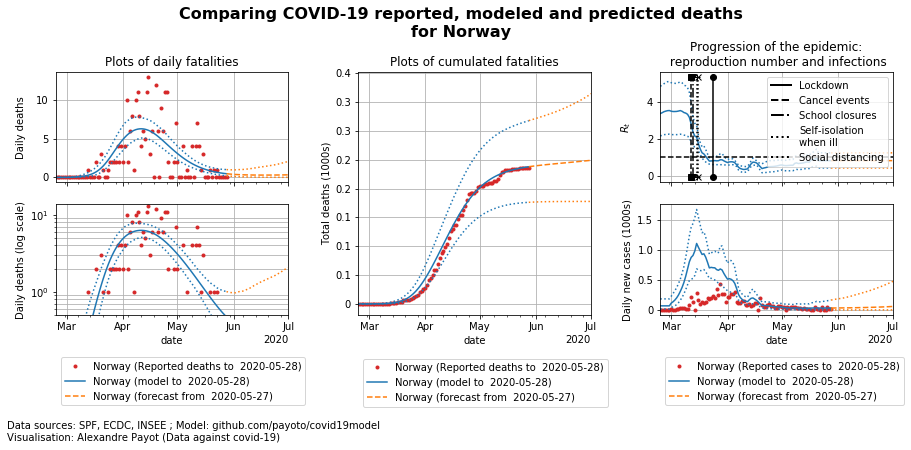

# Rapport de simulation sur la progression et l'impact du COVID19 en Belgium



## Résultats au niveau Belgium



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Belgium 

 Latest simulation on data from 2020-05-28 with version v5

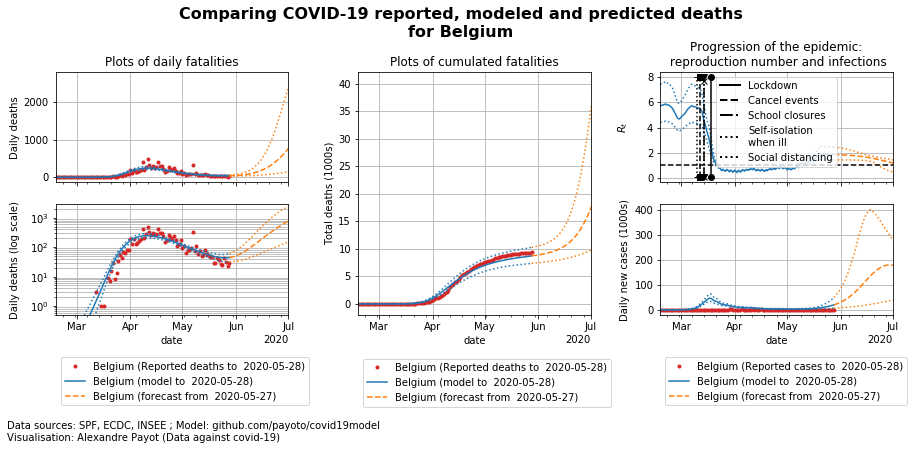

# Rapport de simulation sur la progression et l'impact du COVID19 en Austria



## Résultats au niveau Austria



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Austria 

 Latest simulation on data from 2020-05-28 with version v5

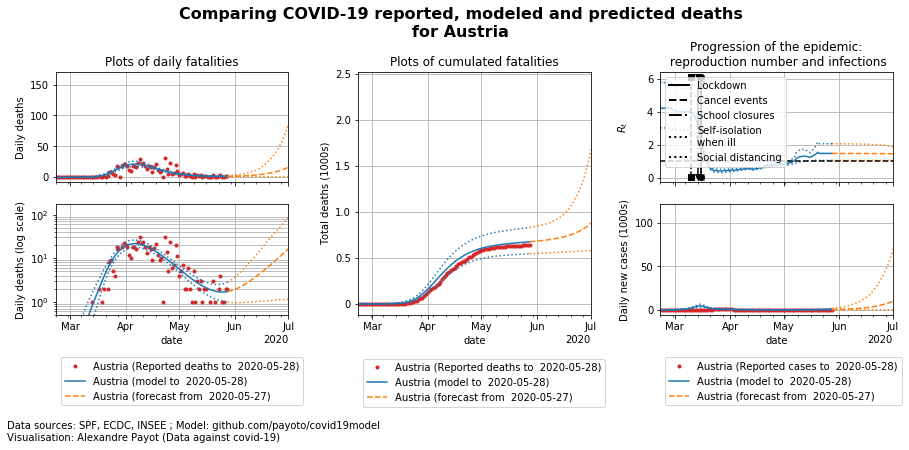

# Rapport de simulation sur la progression et l'impact du COVID19 en Sweden



## Résultats au niveau Sweden



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Sweden 

 Latest simulation on data from 2020-05-28 with version v5

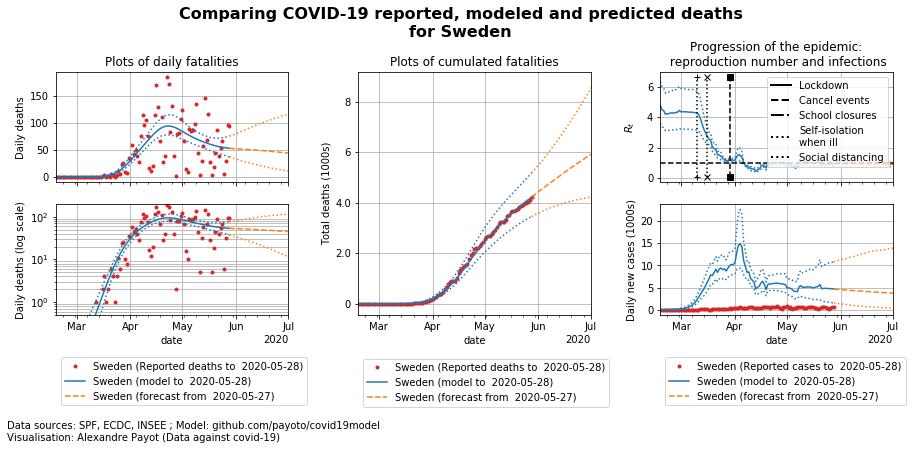

# Rapport de simulation sur la progression et l'impact du COVID19 en Switzerland



## Résultats au niveau Switzerland



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Switzerland 

 Latest simulation on data from 2020-05-28 with version v5

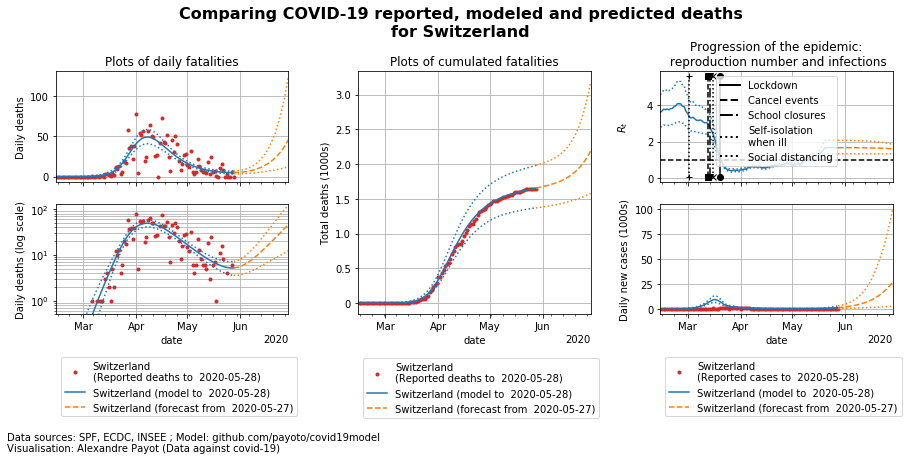

# Rapport de simulation sur la progression et l'impact du COVID19 en Greece



## Résultats au niveau Greece



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Greece 

 Latest simulation on data from 2020-05-28 with version v5

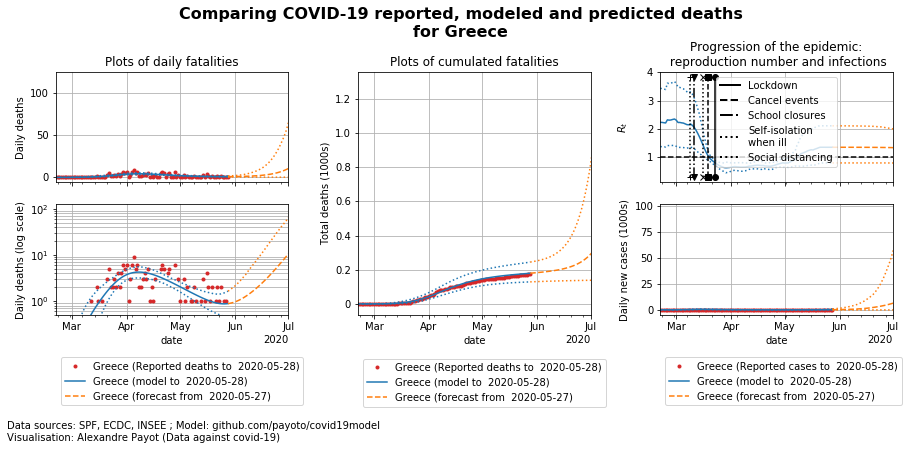

# Rapport de simulation sur la progression et l'impact du COVID19 en Portugal



## Résultats au niveau Portugal



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Portugal 

 Latest simulation on data from 2020-05-28 with version v5

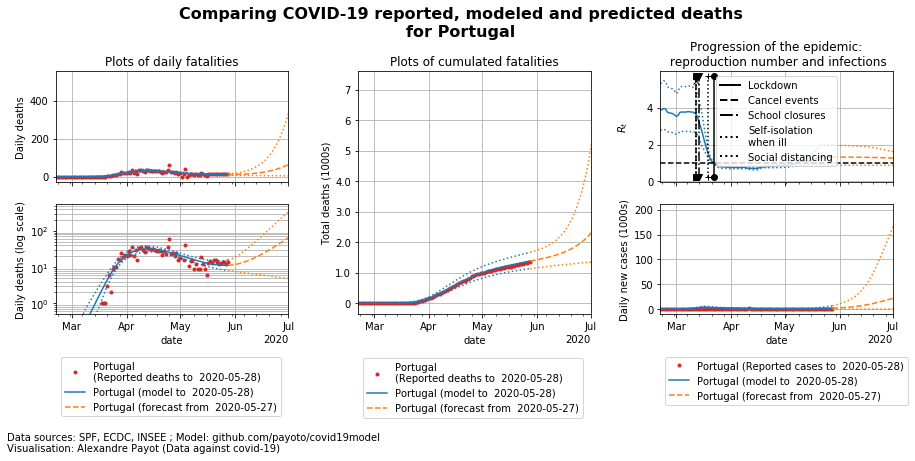

# Rapport de simulation sur la progression et l'impact du COVID19 en Netherlands



## Résultats au niveau Netherlands



Dans cette section vous retrouverez des délimitations non géographiquesde la population



### Netherlands 

 Latest simulation on data from 2020-05-28 with version v5

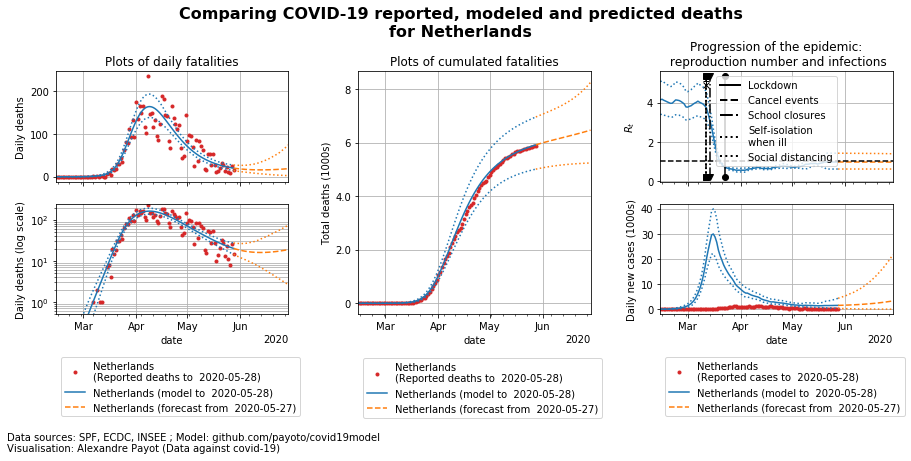

In [54]:
apply_process_region_split(process_zone, country_2_region, analysis_set, zone_dict)

In [13]:
report_dir = os.path.join('reports', 'all_zone_mobility_report')
img_dir = os.path.join(report_dir, 'img')
os.makedirs(report_dir, exist_ok=True)
os.makedirs(img_dir, exist_ok=True)
report_file = os.path.join(report_dir, "all_zone_report.md")
with open(report_file, "w", encoding="utf-8") as file_in:
    print_partial = partial(print_zone, file_in, img_dir, report_dir)
    apply_process_region_split(
        print_partial, country_2_region, analysis_set, zone_dict,
        file_in.write)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


analysis_set